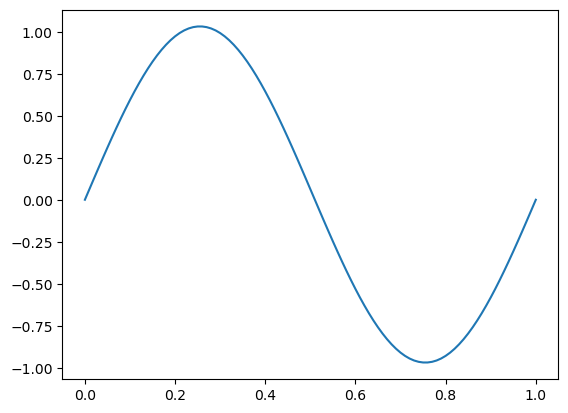

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def solve_dirichlet(alpha, N, phi1, phi2, f):
    ts = [i/N for i in range(N+1)]
    x1s = [phi1(ts[i]) for i in range(N+1)]
    x2s = [phi2(ts[i]) for i in range(N+1)]

    def p(x):
        if x < 1/2:
            return 1
        else:
            return alpha 
    
    def compute_A(i,j):
        first_denominator = np.sqrt((x1s[i] - x1s[i-1]) ** 2 + (x2s[i] - x2s[i-1]) ** 2)
        second_denominator = np.sqrt((x1s[i+1] - x1s[i]) ** 2 + (x2s[i+1] - x2s[i]) ** 2)

        if i == j-1:
            return -1 / first_denominator
        elif i == j+1:
            return -1 / second_denominator
        elif i == j:
            return 1 / first_denominator + 1 / second_denominator
        else:
            return 0
        
    # def phi(t):
    #     return phi1(t), phi2(t)

    
    def compute_F(i):
        first_denominator = np.sqrt((x1s[i] - x1s[i-1]) ** 2 + (x2s[i] - x2s[i-1]) ** 2)
        second_denominator = np.sqrt((x1s[i+1] - x1s[i]) ** 2 + (x2s[i+1] - x2s[i]) ** 2)

        t1 = 1/2 - 1 / np.sqrt(12)
        t2 = 1/2 + 1 / np.sqrt(12)

        phi_vec1 = [phi1(ts[i-1] + t1 * (ts[i] - ts[i-1])), phi2(ts[i-1] + t1 * (ts[i] - ts[i-1]))]
        phi_vec2 = [phi1(ts[i-1] + t2 * (ts[i] - ts[i-1])), phi2(ts[i-1] + t2 * (ts[i] - ts[i-1]))]
        # phi_vec = np.array(phi)

        Ki = 1/2 * f(phi_vec1) * t1 * first_denominator + 1/2 * f(phi_vec2) * t2 * second_denominator
        Ki_plus_1 = 1/2 * f(phi_vec1) * (1 - t1) * first_denominator + 1/2 * f(phi_vec2) * (1 - t2) * second_denominator

        return Ki + Ki_plus_1
        
    A = np.zeros((N+1,N+1))
    F = np.zeros(N+1)
    
    for i in range(1,N):
        F[i] = compute_F(i)
        for j in [i-1,i,i+1]:
            A[i,j] = compute_A(i,j)
    # print(A)

    # dirichlet boundary conditions
    A[0,0] = 1
    F[0] = 0
    A[-1,-1] = 1
    F[-1] = 0
    
    return ts, np.linalg.solve(A,F)

def test_dirichlet():
    alpha = 1
    N = 100

    def phi_1(t):
        return t
    def phi_2(t):
        return t
    def f(x): # x is a vector
        return 2 * np.pi ** 2 * np.sin(2 * np.pi * x[0])
    
    ts, us = solve_dirichlet(alpha, N, phi_1, phi_2, f)
    
    plt.plot(ts,us)

test_dirichlet()